<a href="https://colab.research.google.com/github/mnmadhan/MachineLearning/blob/ML/DecisionTree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree # Make sure plot_tree is imported here


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving play_tennis.csv to play_tennis.csv


In [ ]:
df=pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
le=LabelEncoder()
df['outlook_n'] = le.fit_transform(df['outlook'])
df['temp_n'] = le.fit_transform(df['temp'])
df['humidity_n'] = le.fit_transform(df['humidity'])
df['wind_n'] = le.fit_transform(df['wind'])
df['play_n'] = le.fit_transform(df['play'])

In [ ]:
df


,day,outlook,temp,humidity,wind,play,outlook_n,temp_n,humidity_n,wind_n,play_n
0,D1,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,D2,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,D3,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,D4,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,D5,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1
5,D6,Rain,Cool,Normal,Strong,No,1,0,1,0,0
6,D7,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,D8,Sunny,Mild,High,Weak,No,2,2,0,1,0
8,D9,Sunny,Cool,Normal,Weak,Yes,2,0,1,1,1
9,D10,Rain,Mild,Normal,Weak,Yes,1,2,1,1,1


In [ ]:
df=df.drop(['outlook','temp','humidity','wind','play'],axis=1)

In [ ]:
X = df.drop(['play_n','day'], axis=1)
y = df['play_n']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data:")
print(X_train)
print("\nTesting data:")
print(X_test)


Training data:
    outlook_n  temp_n  humidity_n  wind_n
8           2       0           1       1
2           0       1           0       1
1           2       1           0       0
13          1       2           0       0
4           1       0           1       1
7           2       2           0       1
10          2       2           1       0
3           1       2           0       1
6           0       0           1       0

Testing data:
    outlook_n  temp_n  humidity_n  wind_n
9           1       2           1       1
11          0       2           0       0
0           2       1           0       1
12          0       1           1       1
5           1       0           1       0


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [22]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function

from sklearn.metrics import accuracy_score # Import the accuracy_score function

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 60.00


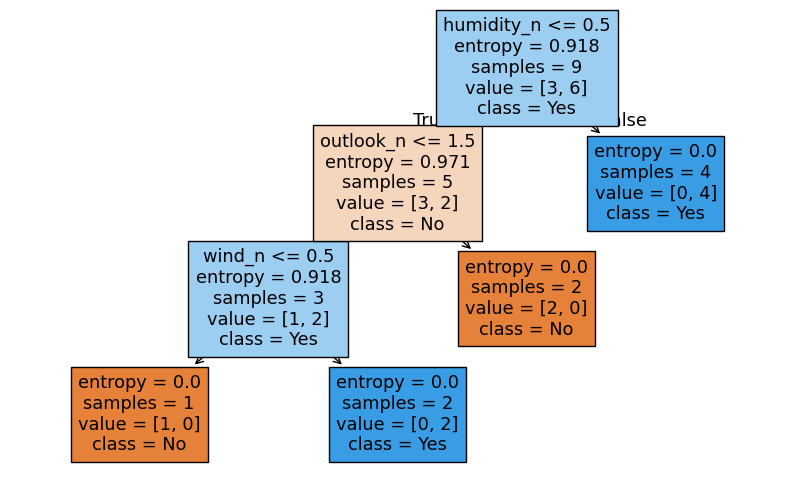

In [27]:
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()